# Problem statement - Concrete Strength Prediction

## Objective:
To predict the concrete strength using the data available in file "concrete.csv". Apply feature engineering and model tuning to obtain a score above 85%.

## Resources Available: 
The data for this project is available in file https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/. The same has been shared along with the course content.

## Attribute Information:
Given are the variable name, variable type, the measurement unit, and a brief description. The concrete compressive strength is the regression problem. The order of this listing corresponds to the order of numerals along the rows of the database.


| Name  |  Data Type | Measurement  |  Description |
|-------|------------|--------------|--------------|
|  Cement (cement)     | quantitative       |       kg in a m3 mixture       |       Input Variable       |
|  Blast Furnace Slag (slag)   |  quantitative       |      kg in a m3 mixture        |     Input Variable         |
|  Fly Ash (ash)   |     quantitative        |   kg in a m3 mixture        |   Input Variable          |
|  Water(water)   |     quantitative        |   kg in a m3 mixture        |   Input Variable          |
| Superplasticizer(superplastic)   |     quantitative        |   kg in a m3 mixture        |   Input Variable   |
|  Coarse Aggregate(coarseagg)   |     quantitative        |   kg in a m3 mixture        |   Input Variable          |
|  Fine Aggregate (fineagg)   |     quantitative        |   kg in a m3 mixture        |   Input Variable          |
|  Age(age)	   |     quantitative        |   Day (1~365)        |   Input Variable          |
|  Concrete compressive strength(strength)   |     quantitative        |    MPa        |   Output Variable         |  
 

## Steps and tasks

### 1. EDA:
      
  `1.Data types and description of the independent attributes which should include (name, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions/tails. (2 Marks)`    
      
  `2.Missing values analysis, Outlier detection, Duplicates check, Comment about if the zero values mean the null value here. (4 Marks)`
      
  `3.Using various plots, write the insights/observations about it. (6 Marks)`

### 2. Bi-variate analysis:

`Between the predictor variables and also between the predictor variables and target column. Comment on your findings in terms of their relationship and degree of relation if any. Visualize the analysis using boxplots and pair plots, histograms, or density curves and write the insights/business understanding of the same. (8 marks)`

### 3. Feature Engineering: 
     
 `1.Identify opportunities (if any) to extract new features from existing features, drop a feature(if required) Hint: Feature Extraction, for example, consider a dataset with two features length and breadth. From this, we can extract a new feature Area which would be length * breadth. (3 Marks)`
     
 `2.Get the data model ready and do a train test split.`
     
 `3.Decide on the complexity of the model, should it be a simple linear model in terms of parameters or would a quadratic or higher degree. (5 Marks)`

### 4. Creating the Model and Tuning It:
     
 `1.Algorithms that you think will be suitable for this project.`
   
 `2.Use Kfold Cross-Validation to evaluate model performance. Use appropriate metrics and make a DataFrame to compare models w.r.t their metrics. (at least 3 algorithms, one bagging and one boosting based algorithms have to be there and try to achieve 90% accuracy on testing set). (7 Marks)`
     
 `3.Techniques employed to squeeze that extra performance out of the model without making it overfit. Use Grid Search or Random Search on any of the two models used above. Make a DataFrame to compare models after hyperparameter tuning and their metrics as above. (8 Marks)`

### 5. Significance of the R2 score from the business perspective:
`Explain the effect of an increase/decrease in the R2 score on the business model. (4 Marks)`

### 6. Inference about the data analysis and recommendations: 

**7.The marks for the score will be according to the following: testing score 90 -95 (5 marks), 85 - 90 (4 marks), 80 - 85( 3 marks), <80 (2 marks)

## <a id = "link1"></a>Import Libraries and Load Dataset

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
# To enable plotting graphs in Jupyter notebook
import seaborn as sns

# Remove scientific notations and display numbers with 2 decimal points instead
pd.options.display.float_format = '{:,.3f}'.format

In [78]:
#Load the file from local directory using pd.read_csv which is a special form of read_table
concrete_df = pd.read_csv("concrete.csv")
concrete_df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.300,212.000,0.000,203.500,0.000,971.800,748.500,28,29.890
1,168.900,42.200,124.300,158.300,10.800,"1,080.800",796.200,14,23.510
2,250.000,0.000,95.700,187.400,5.500,956.900,861.200,28,29.220
3,266.000,114.000,0.000,228.000,0.000,932.000,670.000,28,45.850
4,154.800,183.400,0.000,193.300,9.100,"1,047.400",696.700,28,18.290


## 1. EDA:

### Univariate

In [5]:
concrete_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


- There are 1030 total rows in the dataset and 9 columns (8 predictors and 1 target variable).
- All variables are continuous (all values are numerical). 
- We can see that there are no missing values as number of non-null count is same as total count for each column.

In [32]:
concrete_df.isnull().sum().sum()  # Total number of missing values in the dataframe

0

**Comment**
- Here we did not find any null values, by null values we do not mean 0 values, but any "Nan" or missing values. 

In [33]:
##Identify duplicates records in the dataset
duplicates = concrete_df.duplicated()
sum(duplicates)

25

In [6]:
concrete_df.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,"1,030.00",281.17,104.51,102.00,192.38,272.90,350.00,540.00
slag,"1,030.00",73.90,86.28,0.00,0.00,22.00,142.95,359.40
ash,"1,030.00",54.19,64.00,0.00,0.00,0.00,118.30,200.10
water,"1,030.00",181.57,21.35,121.80,164.90,185.00,192.00,247.00
superplastic,"1,030.00",6.20,5.97,0.00,0.00,6.40,10.20,32.20
coarseagg,"1,030.00",972.92,77.75,801.00,932.00,968.00,"1,029.40","1,145.00"
fineagg,"1,030.00",773.58,80.18,594.00,730.95,779.50,824.00,992.60
age,"1,030.00",45.66,63.17,1.00,7.00,28.00,56.00,365.00
strength,"1,030.00",35.82,16.71,2.33,23.71,34.45,46.14,82.60


- The Mean of cement is approximatively 281 kg/m3 (Minimum: 102 kg/m3 and Maximum: 540 kg/m3). 
- The mean is close to the median for cement, water, superplastic, coarseagg, and fineagg.
- The Mean of slag is approximatively 74 kg/m3 (Minimum: 0 kg/m3 and Maximum: ~359 kg/m3).
- The Mean of age is approximatively 46 days (Minimum: 1 day and Maximum: 365 days).

In [7]:
concrete_df.skew()

cement          0.51
slag            0.80
ash             0.54
water           0.07
superplastic    0.91
coarseagg      -0.04
fineagg        -0.25
age             3.27
strength        0.42
dtype: float64

- Most of the variables are not skewed.
- 'age' variable has the largest skewness (3.27). From concrete_df.describe().T, the age median is 28 days and maximum aging is 365 days, so the age distribution is right skewed.

**Creating a univariate function to plot Distplots:** 

In [110]:
def plot_univariate(dataframe):
    num_var=dataframe.select_dtypes(include='number')
    for column in num_var.columns:
        plt.figure(figsize=(10,5))
        sns.set_style(style="darkgrid")
        sns.distplot(dataframe[column])
        plt.show()

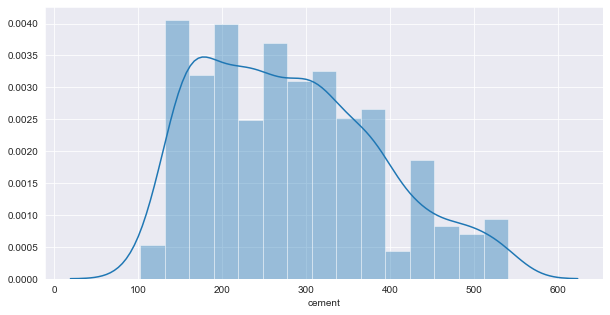

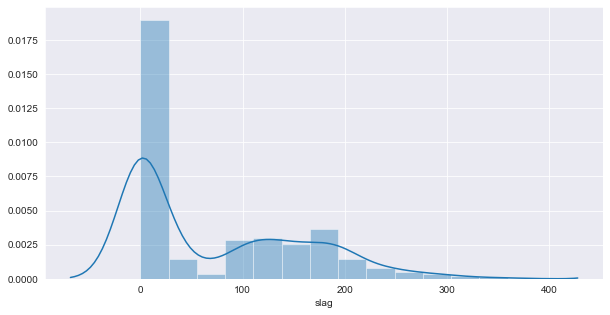

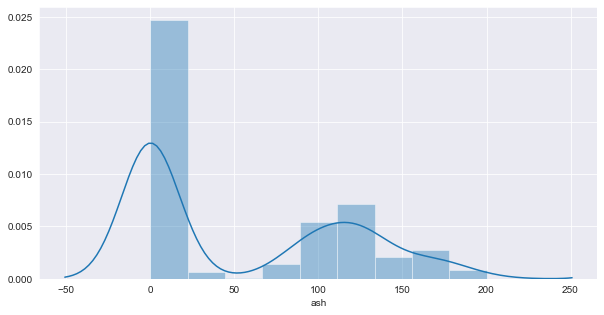

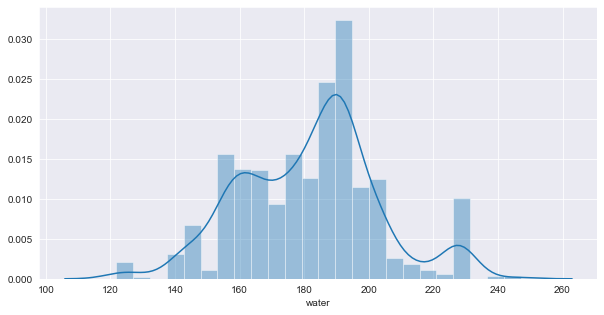

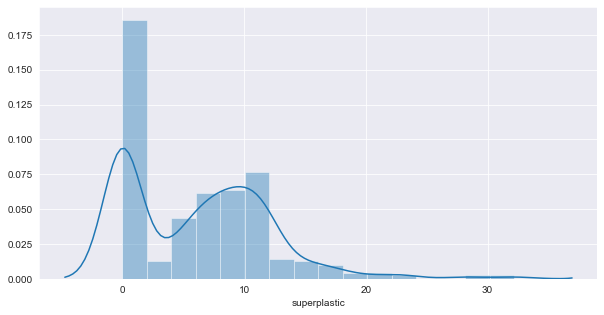

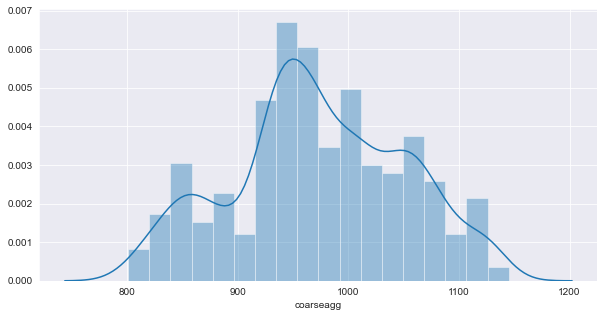

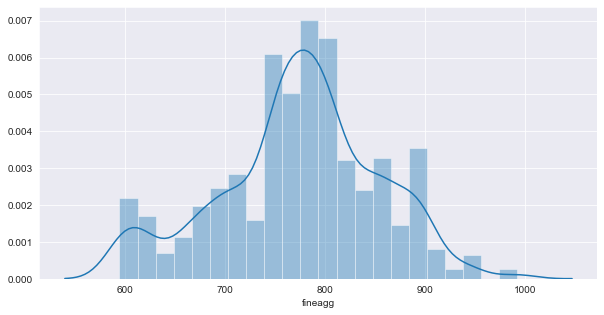

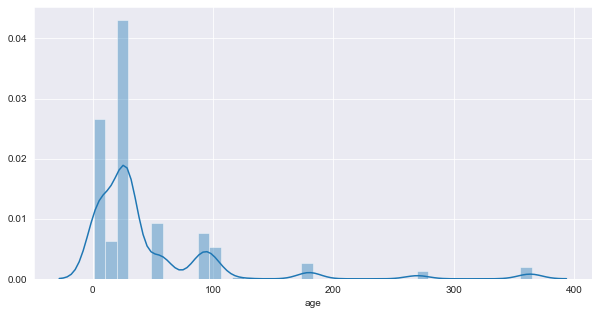

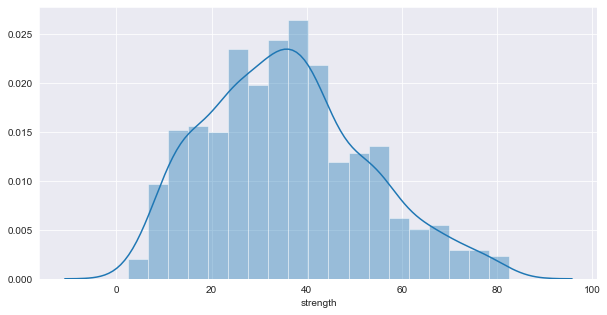

In [111]:
plot_univariate(concrete_df)

**Observations**
- The distribution of cement is almost normal.
- The distributions of slag and ash are slightly positively skewed.
- The distribution of coarseagg and fineagg show similar normal distributions.
- As observed earlier, the age variable is right-skewed.
- The target strength variable shows even distribution.

**Percentage of outliers, in each column of the data, using IQR.**

In [13]:
Q1 = concrete_df.quantile(0.25)             #To find the 25th percentile and 75th percentile.
Q3 = concrete_df.quantile(0.75)

IQR = Q3 - Q1                           #Inter Quantile Range (75th perentile - 25th percentile)

lower=Q1-1.5*IQR                        #Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper=Q3+1.5*IQR

print('Lower Bound for NON Outliers')
print(lower)
print()
print('Upper Bound for NON Outliers')
print(upper)

Lower Bound for NON Outliers
cement          -44.06
slag           -214.42
ash            -177.45
water           124.25
superplastic    -15.30
coarseagg       785.90
fineagg         591.37
age             -66.50
strength         -9.93
dtype: float64

Upper Bound for NON Outliers
cement           586.44
slag             357.38
ash              295.75
water            232.65
superplastic      25.50
coarseagg      1,175.50
fineagg          963.58
age              129.50
strength          79.77
dtype: float64


In [14]:
#Calculating the percentage of outliers for concrete_df dataset:
((concrete_df < lower) | (concrete_df > upper)).sum()/len(concrete_df)*100       

cement         0.00
slag           0.19
ash            0.00
water          0.87
superplastic   0.97
coarseagg      0.00
fineagg        0.49
age            5.73
strength       0.39
dtype: float64

- After identifying outliers, we found them reasonable and could occur in real experiments. Here, we are not going to treat them. 

**Plotting boxplots.**

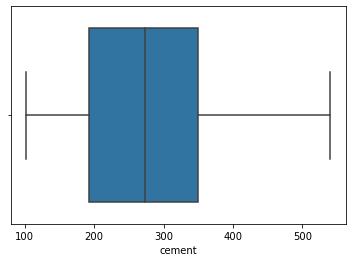

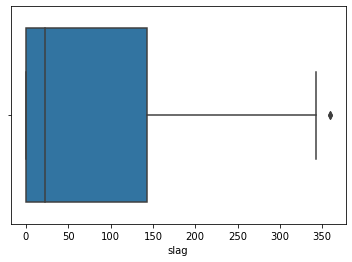

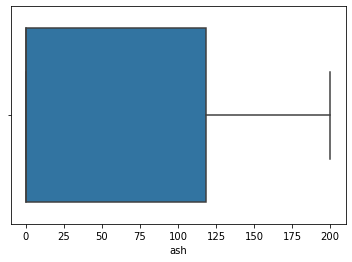

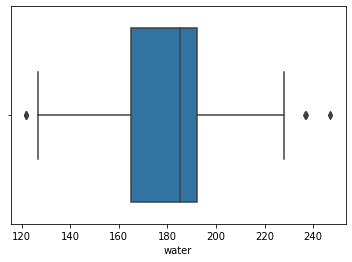

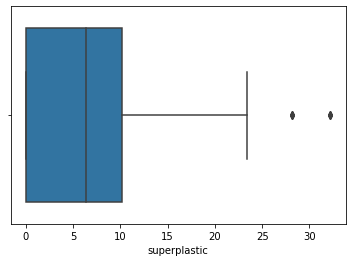

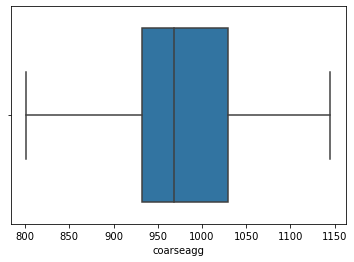

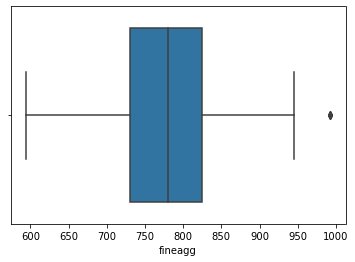

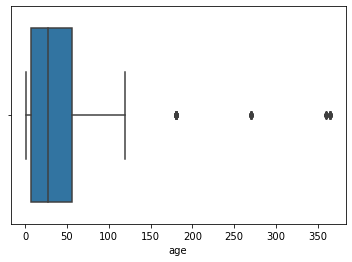

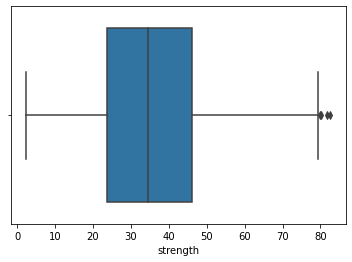

In [15]:
for column in concrete_df.select_dtypes(include='number'):
    sns.boxplot(concrete_df[column])
    plt.show()

- Few outliers are spotted for slag, water, fineagg and strength.
- Age variable has maximum outliers.
- No outliers are observed for cement and ash variables.

**Plotting histograms.**

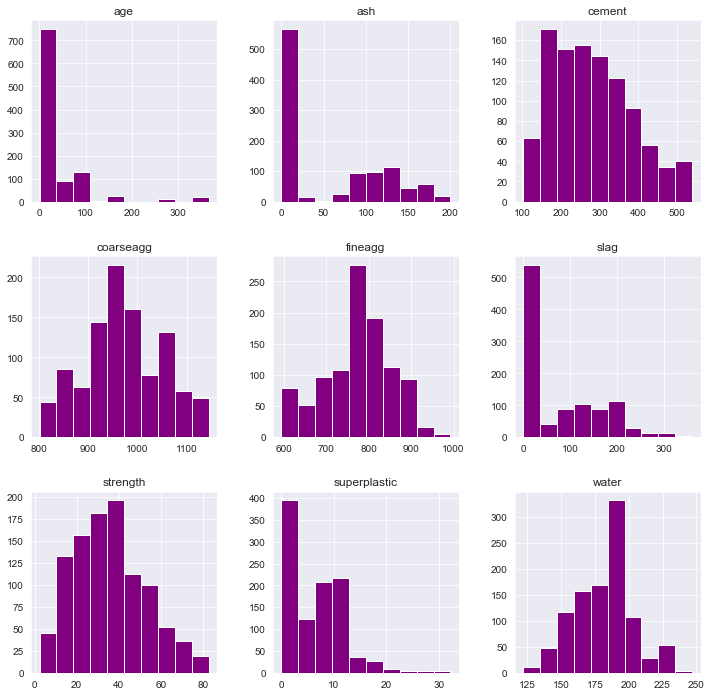

In [84]:
sns.set_style(style="darkgrid")
concrete_df.hist(figsize=(12,12),color="purple",grid=True)
plt.show;

plt.savefig('hist.eps', format='eps')

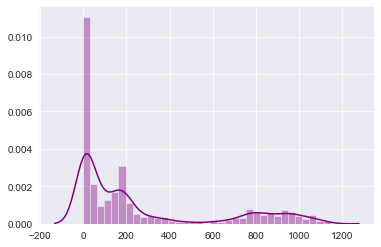

In [82]:
sns.set_style(style="darkgrid")
sns.distplot(concrete_df,color="purple", kde=True)
plt.show;

## 2. Bivariate analysis

**Pairplot**

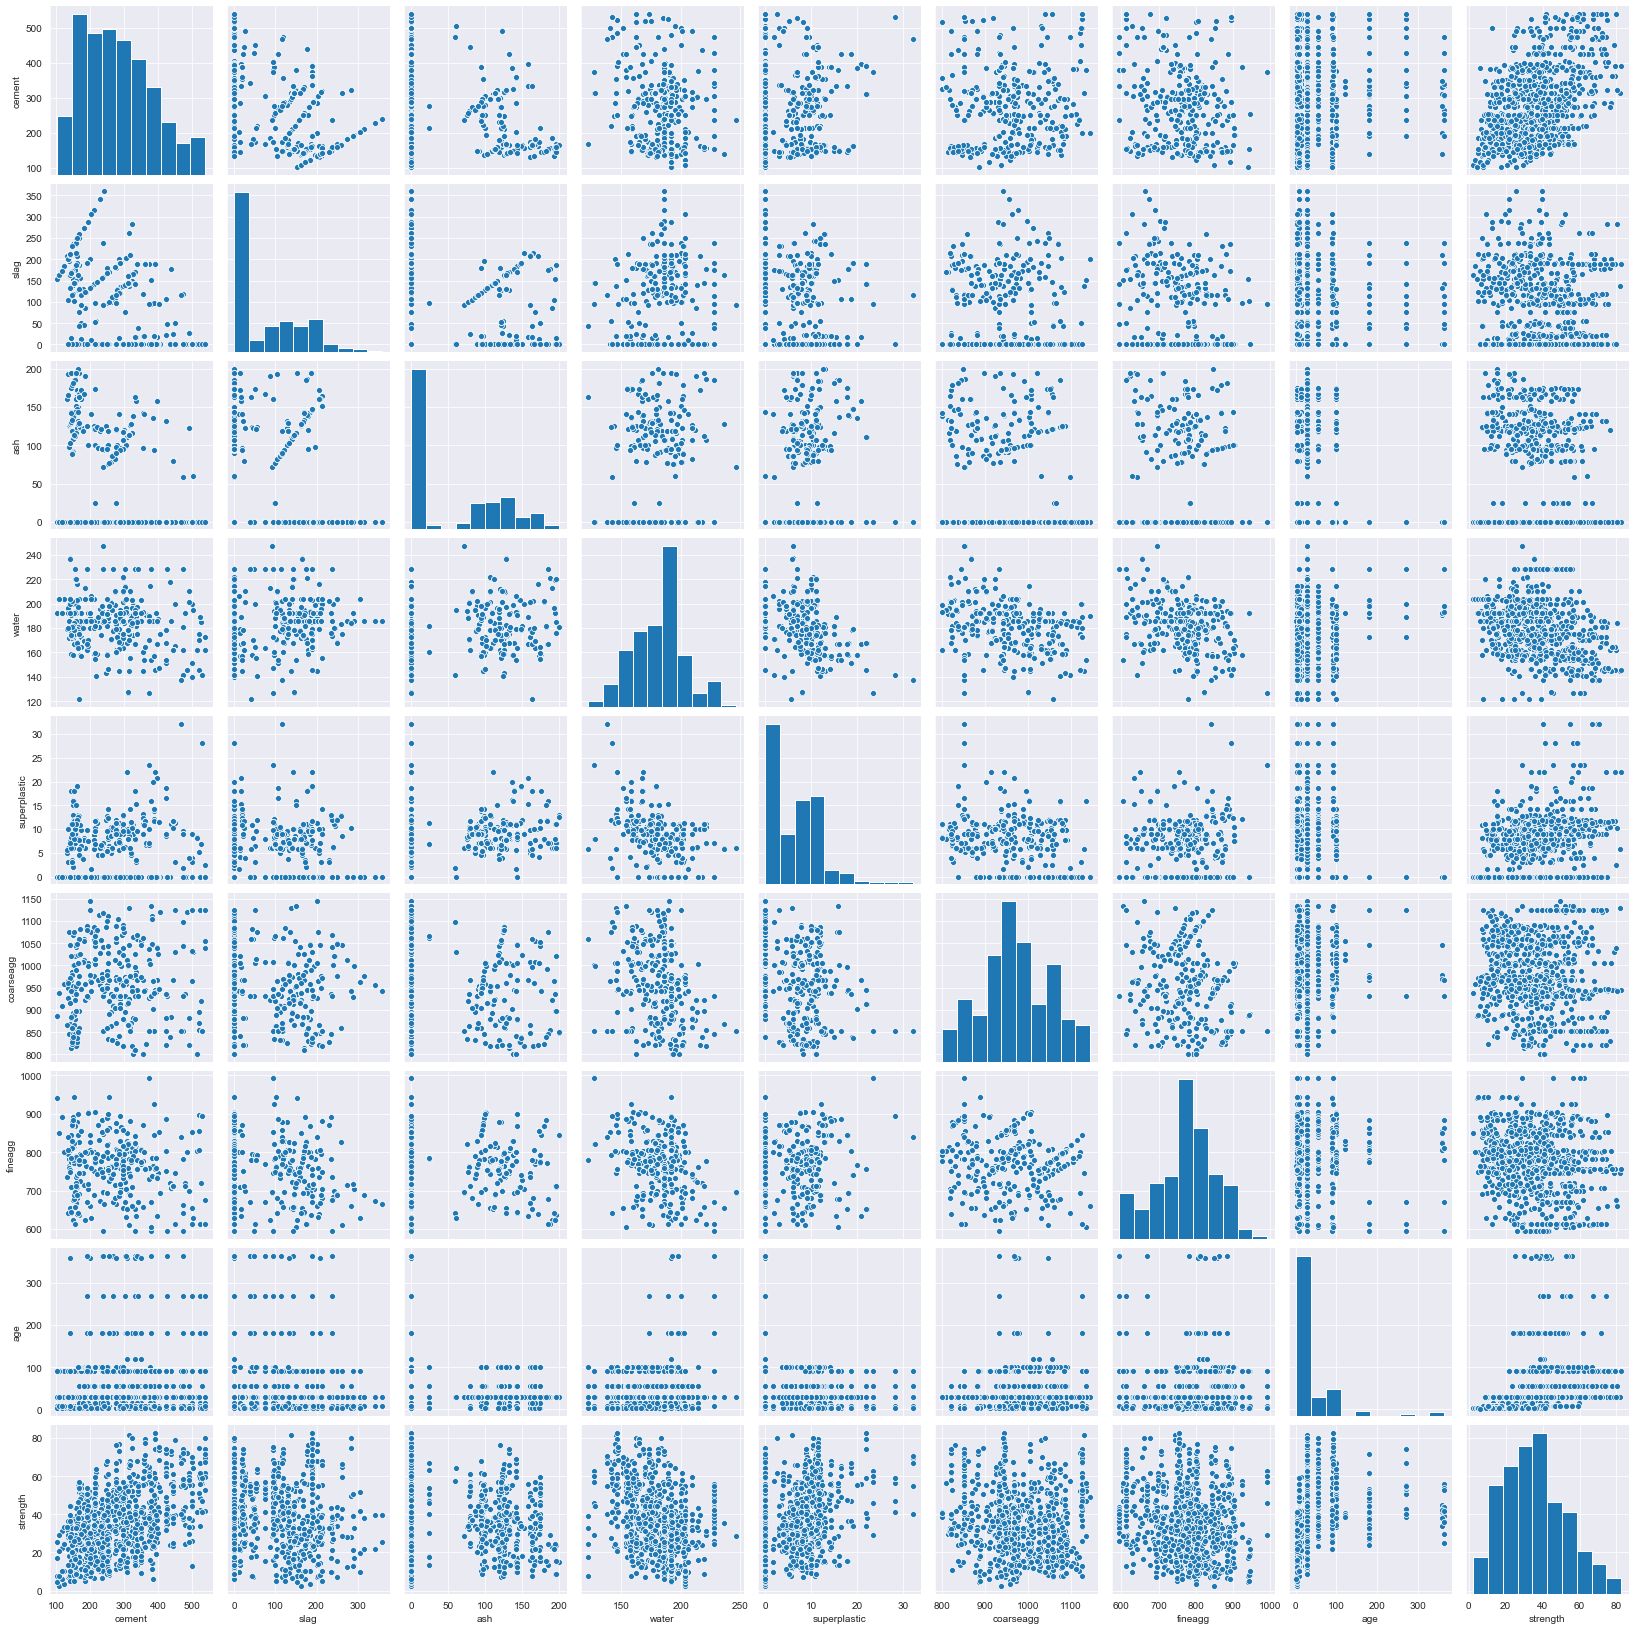

In [8]:
sns.pairplot(concrete_df);

- There are no linear relationships between the different independent variables, as well as between these variables and the dependent target variable "strength".

**Heatmap**

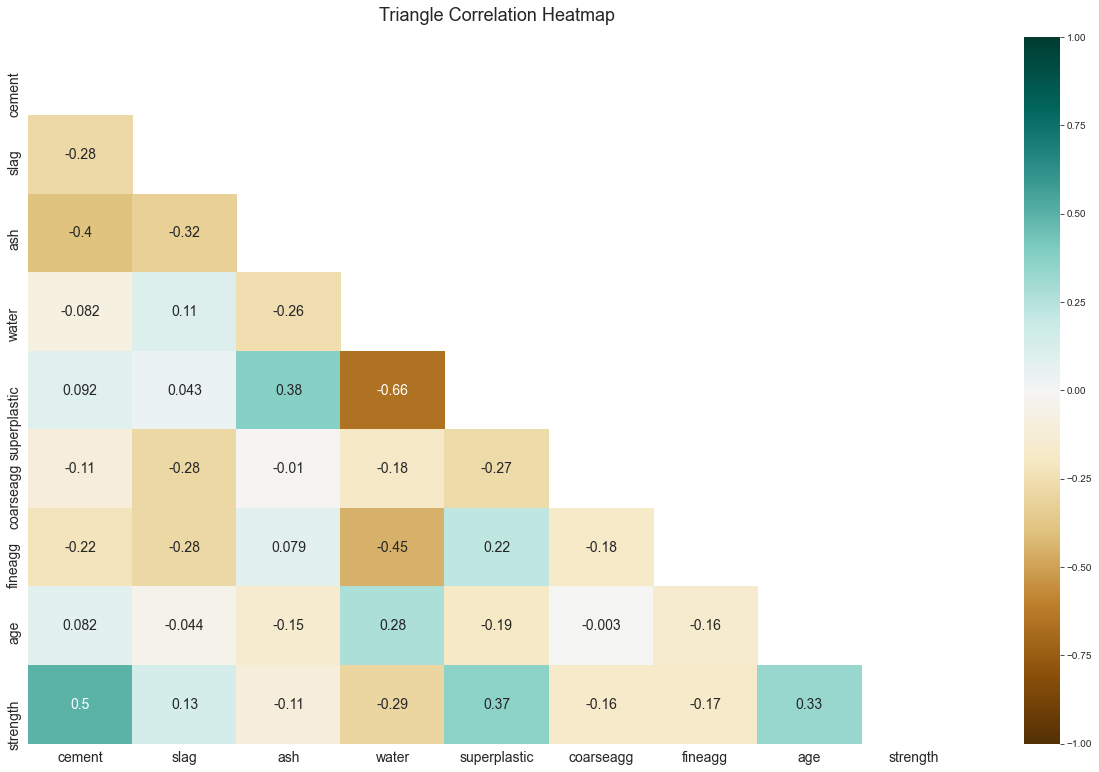

In [102]:
plt.figure(figsize=(21, 13))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(concrete_df.corr(), dtype=np.bool))
sns.set_style('white')
heatmap = sns.heatmap(concrete_df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, annot_kws={'size': 14}, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
plt.savefig('heatmap_original.eps', format='eps')

**Observations**

- We can observe a positive correlation between Compressive Strength and Cement (0.5). The concrete strength indeed increases with an increase in the amount of cement used.
- There is also a strong negative correlation between water and superelastic variables (-0.66). 
- In addition, we noticed correlations between age and Strength, Superplastic and strength. Therefore, age and superplastic are two factors influencing the Compressive Concrete Strength.

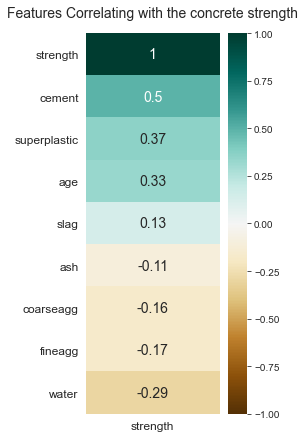

In [271]:
plt.figure(figsize=(3, 7))
heatmap = sns.heatmap(concrete_df.corr()[['strength']].sort_values(by='strength', ascending=False), vmin=-1, vmax=1, annot=True,annot_kws={'size': 14}, cmap='BrBG')
heatmap.set_title('Features Correlating with the concrete strength', fontdict={'fontsize':14}, pad=16);
plt.xticks(fontsize=12);
plt.yticks(fontsize=12);

- The variables that strongly affect the concrete strength are cement, superplastic, age and water.

## 3. Feature Engineering: 

* The water (w) to cement (c) ratio determines the strength and durability of the concrete when it is cured properly. The w/c ratio refers to the ratio of the weights of water and cement used in the concrete mix. The w/c ratio is an important feature in determining the concrete strength, which should be added to the list of predictors (we should also drop cement and water columns).

In [5]:
concrete_df['Water/cement ratio'] = concrete_df['water']/concrete_df['cement']

- To produce a high-strength concrete, usually the excess of water is eliminated by adding Superplasticizer. Here we are more interested on Superplasticizer/water ratio. This ratio is another important feature to take into account, with dropping superplastic column.

In [6]:
concrete_df['superplastic/water ratio'] = concrete_df['superplastic']/concrete_df['water']

- Coarse/fine aggregate ratio is important in determining the compressive strength of concrete. Therefore, we should include this ratio as a new feature (we should drop coarseagg and fineagg columns).

In [7]:
concrete_df['Coarse/fine aggregate ratio'] = concrete_df['coarseagg']/concrete_df['fineagg']

In [8]:
#creating a new dataframe from concrete.csv by droping unnecessary columns
selected_df=concrete_df.drop(['cement','water', 'coarseagg','fineagg', 'superplastic'], axis=1)
selected_df.head()

,slag,ash,age,strength,Water/cement ratio,superplastic/water ratio,Coarse/fine aggregate ratio
0,212.000,0.000,28,29.890,1.440,0.000,1.298
1,42.200,124.300,14,23.510,0.937,0.068,1.357
2,0.000,95.700,28,29.220,0.750,0.029,1.111
3,114.000,0.000,28,45.850,0.857,0.000,1.391
4,183.400,0.000,28,18.290,1.249,0.047,1.503


In [272]:
selected_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   slag                         1030 non-null   float64
 1   ash                          1030 non-null   float64
 2   age                          1030 non-null   int64  
 3   strength                     1030 non-null   float64
 4   Water/cement ratio           1030 non-null   float64
 5   superplastic/water ratio     1030 non-null   float64
 6   Coarse/fine aggregate ratio  1030 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 56.5 KB


- Using feature engineering, we could reduce the data columns from 9 to 7 columns.

#### Re-plotting correlation heatmaps for the selected dataset after feature engineering extraction

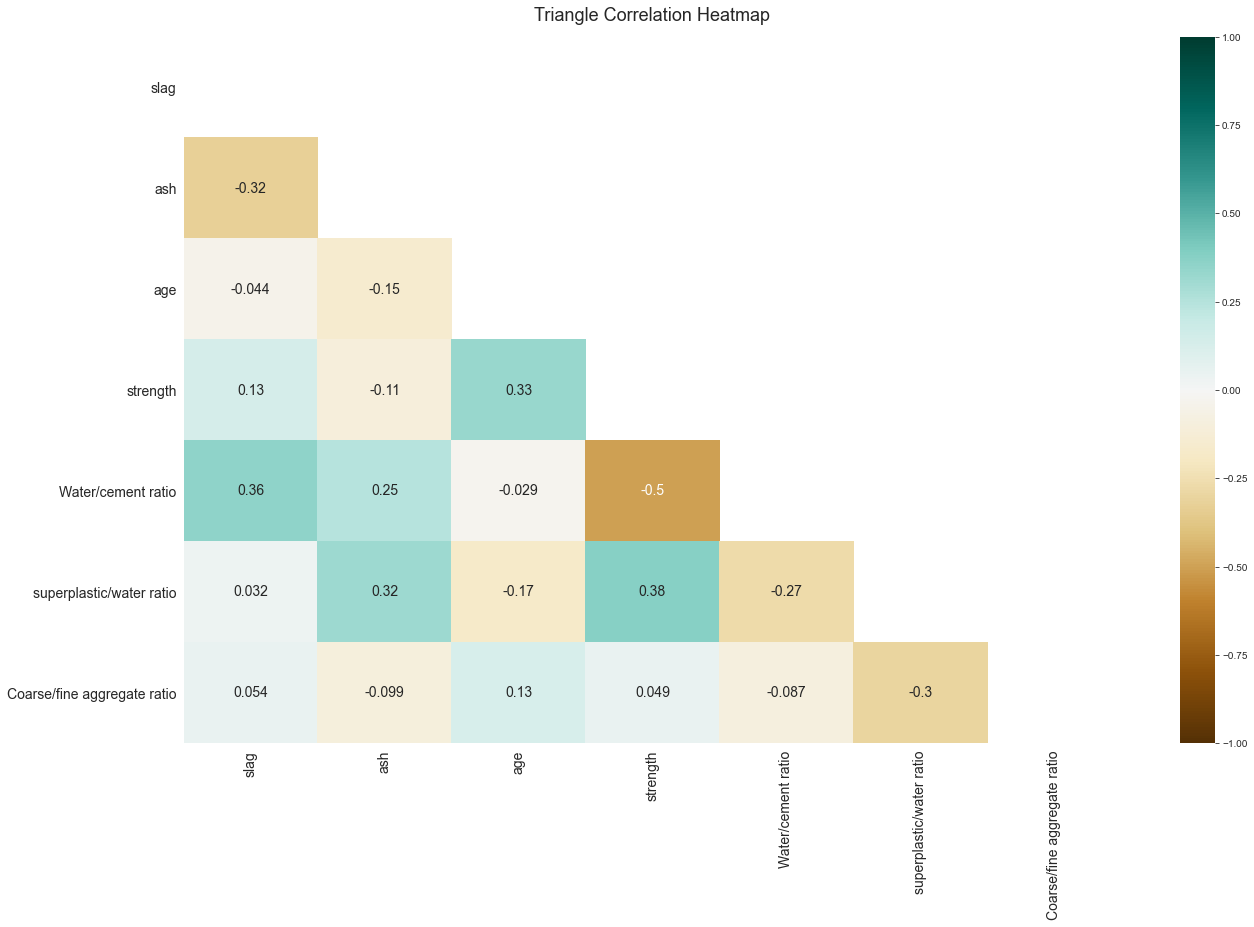

In [101]:
plt.figure(figsize=(21, 13))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(selected_df.corr(), dtype=np.bool))
sns.set_style('white')
heatmap = sns.heatmap(selected_df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, annot_kws={'size': 14}, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
plt.xticks(rotation=90);
plt.savefig('heatmap_selected.eps', format='eps')

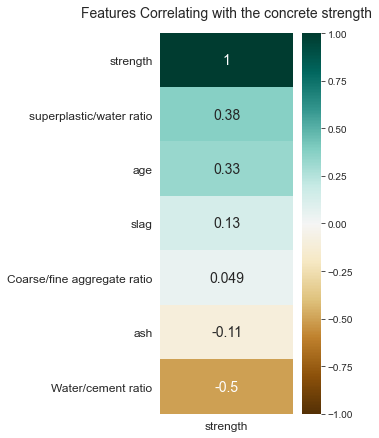

In [263]:
plt.figure(figsize=(3, 7))
heatmap = sns.heatmap(selected_df.corr()[['strength']].sort_values(by='strength', ascending=False), vmin=-1, vmax=1, annot=True,annot_kws={'size': 14}, cmap='BrBG')
heatmap.set_title('Features Correlating with the concrete strength', fontdict={'fontsize':14}, pad=16);
plt.xticks(fontsize=12);
plt.yticks(fontsize=12);

- There are three main input/target correlations: the Water/cement ratio, the superplastic/water ratio and the aging time. 

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


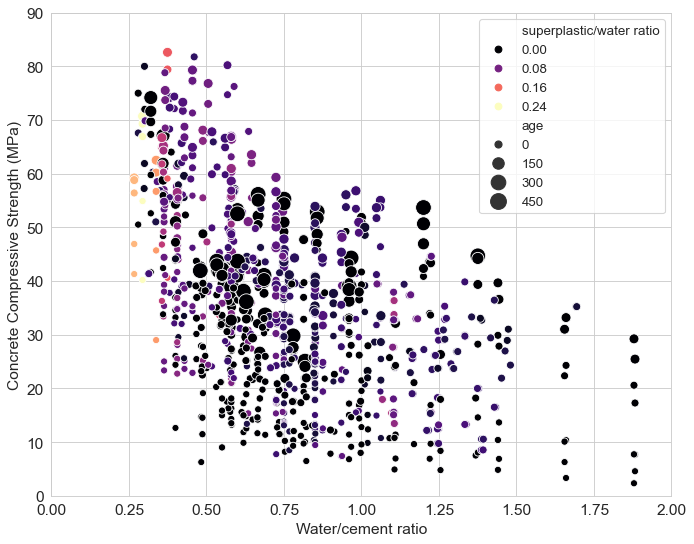

In [10]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as fig
figure(figsize=(10, 8), dpi=80)
sns.set_style(style="whitegrid")
sns.scatterplot(y='strength', x='Water/cement ratio', hue="superplastic/water ratio", palette='magma',size = 'age',data=selected_df, ax=None, sizes=(40, 200));
plt.xlabel('Water/cement ratio', fontsize=14)
plt.ylabel('Concrete Compressive Strength (MPa)', fontsize=14)
plt.xlim(0, 2)
plt.ylim(0, 90)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.savefig('concrete_strength.eps', format='eps')

**Insights**
- **The concrete compressive strength is inversely proportional to the water/cement ratio.** The concrete strength decreases as we increase the water/cement ratio. A small water/cement ratio of 0.3~0.4 is ideal for maximum concrete strength.
- **For given water/cement and superplastic/water ratios, the concrete compressive strength is correlated with the age.** The concrete strength increases as we increase the age time.
- **The concrete compressive strength has high values when superplastic/water ratio between 0.08 and 0.16.**

 ## Split of dataset into training and test set in the ratio of 80:20 (Training:Test) 

In [14]:
from sklearn.model_selection import train_test_split

X = selected_df.drop('strength',axis=1)     
Y = selected_df['strength']  

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=7)

X_train.head()

,slag,ash,age,Water/cement ratio,superplastic/water ratio,Coarse/fine aggregate ratio
15,98.100,24.500,100,0.850,0.037,1.357
308,0.000,96.200,14,0.579,0.056,1.111
159,76.000,0.000,365,0.750,0.000,1.391
482,106.300,0.000,91,0.361,0.107,0.961
417,153.000,0.000,28,1.882,0.000,0.942


## 4. Creating the Model and Tuning It:

As we saw in the previous graph, there is a strong non-linear relationship between **the concrete compressive strength and the water/cement ratio**, also between **the concrete compressive strength and the superplastic/water ratio**. Therefore, Linear regression will not be selected for this project as it will poorly predict the concrete strength based on linear behavior. In this project, we will be using decision trees to build up more robust ensemble techniques as random forest, Adaboost, Gradient boosting.

## Using pipeplines, we will be using Decision Tree, Random Forest, Bagging, Boosting and KNN models to predict the concrete compressive strength. 

## We will be printing all the metrics related to evaluating each model performance (R2,MAE, MSE, and RMSE)

### Decision Tree

In [16]:
from time import time
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV

from sklearn.datasets import load_digits
from sklearn.preprocessing import MinMaxScaler   

from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import make_pipeline

In [17]:
DT_model = DecisionTreeRegressor(criterion='mse')

pipe_DT = make_pipeline(MinMaxScaler(), DecisionTreeRegressor()) 
pipe_DT.fit(X_train, Y_train)
print('Train Accuracy: %.3f' % pipe_DT.score(X_train, Y_train))

Train Accuracy: 0.996


In [18]:
print('Test Accuracy: %.3f' % pipe_DT.score(X_test, Y_test))

Test Accuracy: 0.858


**Observation:** `There is an obvious overfitting in the model due to which the test accuracy drops.` 

#### Pruning the decision tree

In [19]:
DT_model = DecisionTreeRegressor(criterion='mse', max_depth=3)

pipe_DT = make_pipeline(MinMaxScaler(), DecisionTreeRegressor()) 
pipe_DT.fit(X_train, Y_train)
print('Train Accuracy: %.3f' % pipe_DT.score(X_train, Y_train))

Train Accuracy: 0.996


In [20]:
print('Test Accuracy: %.3f' % pipe_DT.score(X_test, Y_test))

Test Accuracy: 0.850


**Observation:** `The same overfitting is still there even after pruning.`

In [21]:
pipe_DT_predict= pipe_DT.predict(X_test)

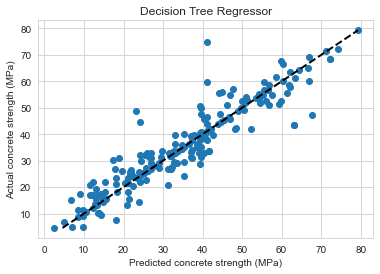

In [22]:
plt.scatter(pipe_DT_predict, Y_test) 
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2) 
plt.xlabel("Predicted concrete strength (MPa)") 
plt.ylabel("Actual concrete strength (MPa)") 
plt.title("Decision Tree Regressor") 
plt.show()

### Random Forest

In [23]:
from sklearn.ensemble import RandomForestRegressor

In [24]:
RF_model = RandomForestRegressor(n_estimators=100, criterion='mse')

pipe_RF = make_pipeline(MinMaxScaler(), RandomForestRegressor()) 
pipe_RF.fit(X_train, Y_train)
print('Train Accuracy: %.3f' % pipe_RF.score(X_train, Y_train))

Train Accuracy: 0.983


In [25]:
print('Test Accuracy: %.3f' % pipe_RF.score(X_test, Y_test))

Test Accuracy: 0.927


In [26]:
pipe_RF_predict= pipe_RF.predict(X_test)

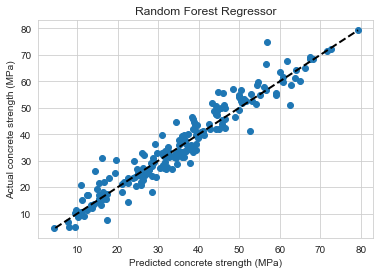

In [27]:
plt.scatter(pipe_RF_predict, Y_test) 
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2) 
plt.xlabel("Predicted concrete strength (MPa)") 
plt.ylabel("Actual concrete strength (MPa)") 
plt.title("Random Forest Regressor") 
plt.show()

### Bagging

In [28]:
from sklearn.ensemble import BaggingRegressor

In [29]:
Bag_model = BaggingRegressor(n_estimators=100)

pipe_Bag = make_pipeline(MinMaxScaler(), BaggingRegressor()) 
pipe_Bag.fit(X_train, Y_train)
print('Train Accuracy: %.3f' % pipe_Bag.score(X_train, Y_train))

Train Accuracy: 0.977


In [30]:
print('Test Accuracy: %.3f' % pipe_Bag.score(X_test, Y_test))

Test Accuracy: 0.919


In [31]:
pipe_Bag_predict= pipe_Bag.predict(X_test)

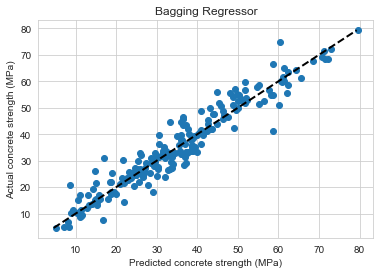

In [32]:
plt.scatter(pipe_Bag_predict, Y_test) 
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2) 
plt.xlabel("Predicted concrete strength (MPa)") 
plt.ylabel("Actual concrete strength (MPa)") 
plt.title("Bagging Regressor") 
plt.show()

### AdaBoost

In [33]:
from sklearn.ensemble import AdaBoostRegressor

In [34]:
Ada_model = AdaBoostRegressor(n_estimators=100)

pipe_Ada = make_pipeline(MinMaxScaler(), AdaBoostRegressor()) 
pipe_Ada.fit(X_train, Y_train)
print('Train Accuracy: %.3f' % pipe_Ada.score(X_train, Y_train))

Train Accuracy: 0.821


In [35]:
print('Test Accuracy: %.3f' % pipe_Bag.score(X_test, Y_test))

Test Accuracy: 0.919


In [36]:
pipe_Ada_predict= pipe_Ada.predict(X_test)

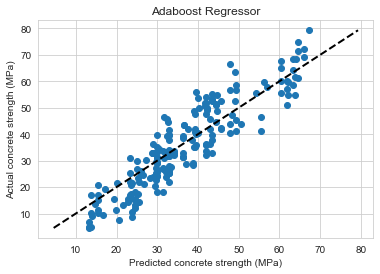

In [37]:
plt.scatter(pipe_Ada_predict, Y_test) 
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2) 
plt.xlabel("Predicted concrete strength (MPa)") 
plt.ylabel("Actual concrete strength (MPa)") 
plt.title("Adaboost Regressor") 
plt.show()

### Gradient Boosting

In [38]:
from sklearn.ensemble import GradientBoostingRegressor

In [39]:
Grad_model = GradientBoostingRegressor(n_estimators=100)

pipe_Grad = make_pipeline(MinMaxScaler(), GradientBoostingRegressor()) 
pipe_Grad.fit(X_train, Y_train)
print('Train Accuracy: %.3f' % pipe_Grad.score(X_train, Y_train))

Train Accuracy: 0.940


In [40]:
print('Test Accuracy: %.3f' % pipe_Grad.score(X_test, Y_test))

Test Accuracy: 0.926


In [41]:
pipe_Grad_predict= pipe_Grad.predict(X_test)

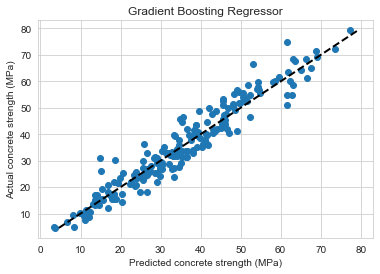

In [42]:
plt.scatter(pipe_Grad_predict, Y_test) 
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2) 
plt.xlabel("Predicted concrete strength (MPa)") 
plt.ylabel("Actual concrete strength (MPa)") 
plt.title("Gradient Boosting Regressor") 
plt.show()

### KNN

In [43]:
from sklearn.neighbors import KNeighborsRegressor

In [44]:
KNN_model = KNeighborsRegressor(n_neighbors=5)

pipe_KNN = make_pipeline(MinMaxScaler(), KNeighborsRegressor()) 
pipe_KNN.fit(X_train, Y_train)
print('Train Accuracy: %.3f' % pipe_KNN.score(X_train, Y_train))

Train Accuracy: 0.834


In [45]:
print('Test Accuracy: %.3f' % pipe_KNN.score(X_test, Y_test))

Test Accuracy: 0.737


In [46]:
pipe_KNN_predict= pipe_KNN.predict(X_test)

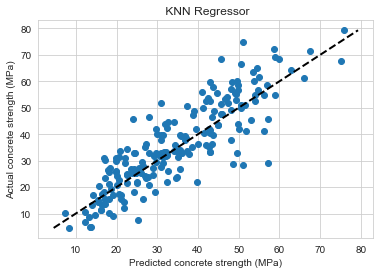

In [47]:
plt.scatter(pipe_KNN_predict, Y_test) 
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2) 
plt.xlabel("Predicted concrete strength (MPa)") 
plt.ylabel("Actual concrete strength (MPa)") 
plt.title(" KNN Regressor") 
plt.show()

### We are going to use Random search with cross-validation to tune the hyperparameters of the Random Forest, Bagging and the Gradient Boosting models as they gave the highest R2 scores on the test dataset

**Random Forest hyperparameter tuning**

In [203]:
# parameters and distributions 
RF_param_dist = {'n_estimators':sp_randint(10, 100),
              'max_depth': [3, None],
              'max_features': sp_randint(1, 6),
              'min_samples_split': sp_randint(1, 10),
              'min_samples_leaf': sp_randint(1, 10),
              'bootstrap': [True, False],
              'random_state':sp_randint (0,40),
              'criterion': ['mse','mae']}

In [204]:
# run randomized search with Cross-validation
samples = 10  # number of random samples 
randomCV = RandomizedSearchCV(RF_model, param_distributions=RF_param_dist, n_iter=samples) 

In [205]:
randomCV.fit(X_train, Y_train)
print(randomCV.best_params_)

{'bootstrap': True, 'criterion': 'mae', 'max_depth': None, 'max_features': 2, 'min_samples_leaf': 2, 'min_samples_split': 8, 'n_estimators': 91, 'random_state': 11}


**Running again Random Forest with the new obtained hyperparameters**

In [206]:
RF_model = RandomForestRegressor()

pipe_RF = make_pipeline(MinMaxScaler(), RandomForestRegressor(bootstrap =True, criterion= 'mae', max_depth= None, max_features = 2, min_samples_leaf= 2, min_samples_split = 8, n_estimators = 91, random_state = 11)) 
pipe_RF.fit(X_train, Y_train)
print('Train Accuracy: %.3f' % pipe_RF.score(X_train, Y_train))

Train Accuracy: 0.937


In [207]:
print('Test Accuracy: %.3f' % pipe_RF.score(X_test, Y_test))

Test Accuracy: 0.892


In [208]:
pipe_RF_predict= pipe_RF.predict(X_test)

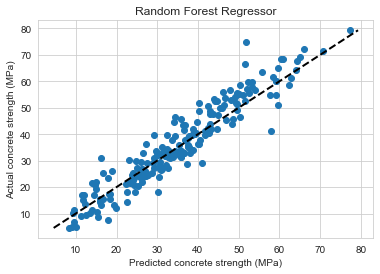

In [209]:
plt.scatter(pipe_RF_predict, Y_test) 
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2) 
plt.xlabel("Predicted concrete strength (MPa)") 
plt.ylabel("Actual concrete strength (MPa)") 
plt.title("Random Forest Regressor") 
plt.show()

**Bagging hyperparameter tuning**

In [210]:
# parameters and distributions to sample from
Bag_param_dist = {'n_estimators':sp_randint(10, 100),
              'max_samples': [10, None],
              'max_features': sp_randint(1, 6),
              'bootstrap': [True, False],
              'bootstrap_features': [True, False],
              'oob_score': [True, False],
              'warm_start': [True, False],
              'random_state':sp_randint (0,40)}

In [211]:
# run randomized search
samples = 10  # number of random samples 
randomCV = RandomizedSearchCV(Bag_model, param_distributions=Bag_param_dist, n_iter=samples) 

In [212]:
randomCV.fit(X_train, Y_train)
print(randomCV.best_params_)

{'bootstrap': True, 'bootstrap_features': False, 'max_features': 4, 'max_samples': 10, 'n_estimators': 34, 'oob_score': False, 'random_state': 19, 'warm_start': True}


**Running again Bagging model with the new obtained hyperparameters**

In [213]:
Bag_model = BaggingRegressor(bootstrap=True, bootstrap_features=False, max_features = 4, max_samples = 10, n_estimators = 34, oob_score = False, random_state = 19, warm_start = True)

pipe_Bag = make_pipeline(MinMaxScaler(), BaggingRegressor()) 
pipe_Bag.fit(X_train, Y_train)
print('Train Accuracy: %.3f' % pipe_Bag.score(X_train, Y_train))

Train Accuracy: 0.979


In [214]:
print('Test Accuracy: %.3f' % pipe_Bag.score(X_test, Y_test))

Test Accuracy: 0.924


In [215]:
pipe_Bag_predict= pipe_Bag.predict(X_test)

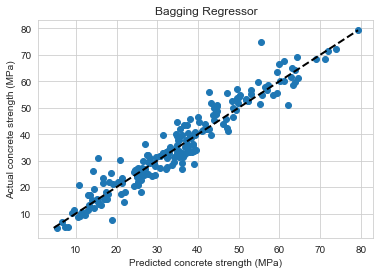

In [216]:
plt.scatter(pipe_Bag_predict, Y_test) 
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2) 
plt.xlabel("Predicted concrete strength (MPa)") 
plt.ylabel("Actual concrete strength (MPa)") 
plt.title("Bagging Regressor") 
plt.show()

**Gradient Boosting hyperparameter tuning**

In [217]:
# parameters and distributions to sample from
Grad_param_dist = {'n_estimators':sp_randint(10, 100),
              'loss': ['ls','lad','huber','quantile'],
              'criterion': ['friedman_mse','mse', 'mae'],
              'min_samples_split':sp_randint(1, 10),
              'min_samples_leaf':sp_randint(1, 10),
              'max_depth':sp_randint(3, 10),
              'min_impurity_decrease':sp_randint(0, 3),
              'random_state':sp_randint (0,40),
              'max_features':['auto','sqrt','log2',None]}

In [218]:
# run randomized search
samples = 10  # number of random samples 
randomCV = RandomizedSearchCV(Grad_model, param_distributions=Grad_param_dist, n_iter=samples) 

In [219]:
randomCV.fit(X_train, Y_train)
print(randomCV.best_params_)

{'criterion': 'friedman_mse', 'loss': 'lad', 'max_depth': 8, 'max_features': None, 'min_impurity_decrease': 0, 'min_samples_leaf': 8, 'min_samples_split': 3, 'n_estimators': 95, 'random_state': 2}


**Running again Gradient Boosting model with the new obtained hyperparameters**

In [221]:
Grad_model = GradientBoostingRegressor()

pipe_Grad = make_pipeline(MinMaxScaler(), GradientBoostingRegressor(criterion='friedman_mse', loss = 'lad', max_depth =8, max_features = None, min_impurity_decrease = 0, min_samples_leaf = 8, min_samples_split= 3, n_estimators = 95, random_state = 2)) 
pipe_Grad.fit(X_train, Y_train)
print('Train Accuracy: %.3f' % pipe_Grad.score(X_train, Y_train))

Train Accuracy: 0.961


In [222]:
print('Test Accuracy: %.3f' % pipe_Grad.score(X_test, Y_test))

Test Accuracy: 0.928


In [223]:
pipe_Grad_predict= pipe_Grad.predict(X_test)

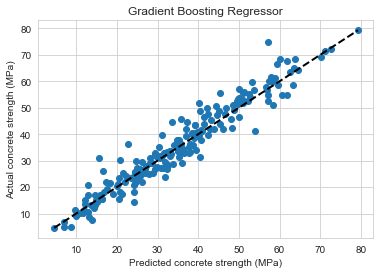

In [224]:
plt.scatter(pipe_Grad_predict, Y_test) 
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2) 
plt.xlabel("Predicted concrete strength (MPa)") 
plt.ylabel("Actual concrete strength (MPa)") 
plt.title("Gradient Boosting Regressor") 
plt.show()

## Performance summary of all used models:

In [251]:
#Let's define a function to get all the metrics

import sklearn.metrics as metrics
def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('Explained_variance: ', round(explained_variance,3))    
    print('Mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('R2: ', round(r2,3))
    print('MAE (MPa):', round(mean_absolute_error,3))
    print('MSE (MPa):', round(mse,3))
    print('RMSE (MPa):', round(np.sqrt(mse),3))

In [252]:
print('Decision Tree Regressor:')
regression_results(Y_test,pipe_DT_predict)

Decision Tree Regressor:
Explained_variance:  0.888
Mean_squared_log_error:  0.0403
R2:  0.887
MAE (MPa): 3.485
MSE (MPa): 29.199
RMSE (MPa): 5.404


In [253]:
print('Random Forest Regressor:')
regression_results(Y_test,pipe_RF_predict)

Random Forest Regressor:
Explained_variance:  0.895
Mean_squared_log_error:  0.0346
R2:  0.892
MAE (MPa): 4.046
MSE (MPa): 27.737
RMSE (MPa): 5.267


In [254]:
print('Bagging Regressor:')
regression_results(Y_test,pipe_Bag_predict)

Bagging Regressor:
Explained_variance:  0.925
Mean_squared_log_error:  0.0253
R2:  0.924
MAE (MPa): 3.276
MSE (MPa): 19.669
RMSE (MPa): 4.435


In [255]:
print('AdaBoost Regressor:')
regression_results(Y_test,pipe_Ada_predict)

AdaBoost Regressor:
Explained_variance:  0.818
Mean_squared_log_error:  0.0678
R2:  0.816
MAE (MPa): 5.713
MSE (MPa): 47.36
RMSE (MPa): 6.882


In [256]:
print('Gradient Boosting Regressor:')
regression_results(Y_test,pipe_Grad_predict)

Gradient Boosting Regressor:
Explained_variance:  0.93
Mean_squared_log_error:  0.0209
R2:  0.928
MAE (MPa): 3.078
MSE (MPa): 18.464
RMSE (MPa): 4.297


In [257]:
print('KNN Regressor:')
regression_results(Y_test,pipe_KNN_predict)

KNN Regressor:
Explained_variance:  0.743
Mean_squared_log_error:  0.0727
R2:  0.737
MAE (MPa): 6.303
MSE (MPa): 67.966
RMSE (MPa): 8.244


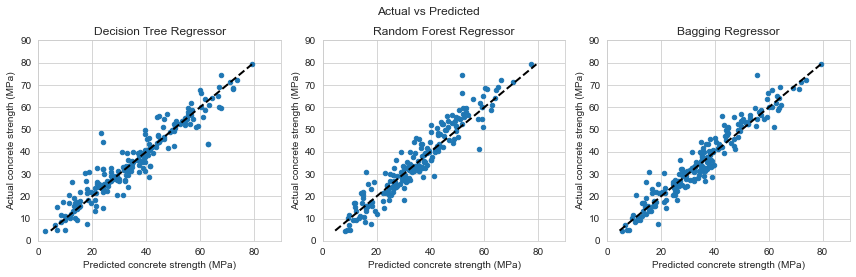

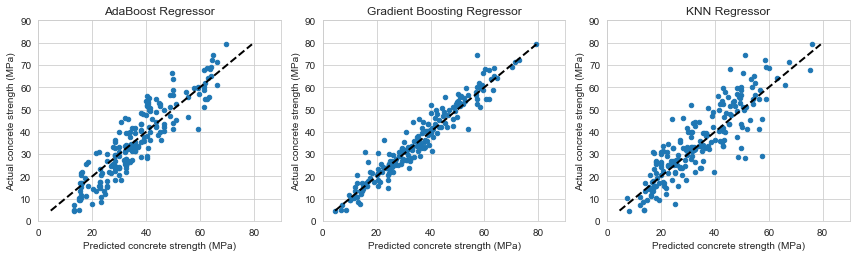

In [232]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12,4)) 

ax1.scatter(pipe_DT_predict, Y_test, s=20) 
ax1.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2) 
ax1.set_ylabel("Actual concrete strength (MPa)") 
ax1.set_xlabel("Predicted concrete strength (MPa)") 
ax1.set_title("Decision Tree Regressor") 
ax1.set_xlim (0,90)
ax1.set_ylim (0,90)

ax2.scatter(pipe_RF_predict, Y_test, s=20) 
ax2.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2) 
ax2.set_ylabel("Actual concrete strength (MPa)") 
ax2.set_xlabel("Predicted concrete strength (MPa)") 
ax2.set_title("Random Forest Regressor") 
ax2.set_xlim (0,90)
ax2.set_ylim (0,90)

ax3.scatter(pipe_Bag_predict, Y_test, s=20) 
ax3.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2) 
ax3.set_ylabel("Actual concrete strength (MPa)") 
ax3.set_xlabel("Predicted concrete strength (MPa)") 
ax3.set_title("Bagging Regressor") 
ax3.set_xlim (0,90)
ax3.set_ylim (0,90)

fig.suptitle("Actual vs Predicted") 
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('Actual-predicted1.eps', format='eps')

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12,4)) 

ax1.scatter(pipe_Ada_predict, Y_test, s=20) 
ax1.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2) 
ax1.set_ylabel("Actual concrete strength (MPa)") 
ax1.set_xlabel("Predicted concrete strength (MPa)") 
ax1.set_title("AdaBoost Regressor") 
ax1.set_xlim (0,90)
ax1.set_ylim (0,90)

ax2.scatter(pipe_Grad_predict, Y_test, s=20) 
ax2.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2) 
ax2.set_ylabel("Actual concrete strength (MPa)") 
ax2.set_xlabel("Predicted concrete strength (MPa)") 
ax2.set_title("Gradient Boosting Regressor") 
ax2.set_xlim (0,90)
ax2.set_ylim (0,90)

ax3.scatter(pipe_KNN_predict, Y_test, s=20) 
ax3.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2) 
ax3.set_ylabel("Actual concrete strength (MPa)") 
ax3.set_xlabel("Predicted concrete strength (MPa)") 
ax3.set_title("KNN Regressor") 
ax3.set_xlim (0,90)
ax3.set_ylim (0,90)

fig.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.savefig('Actual-predicted2.eps', format='eps')

## 5. Significance of the R2 score from the business perspective:

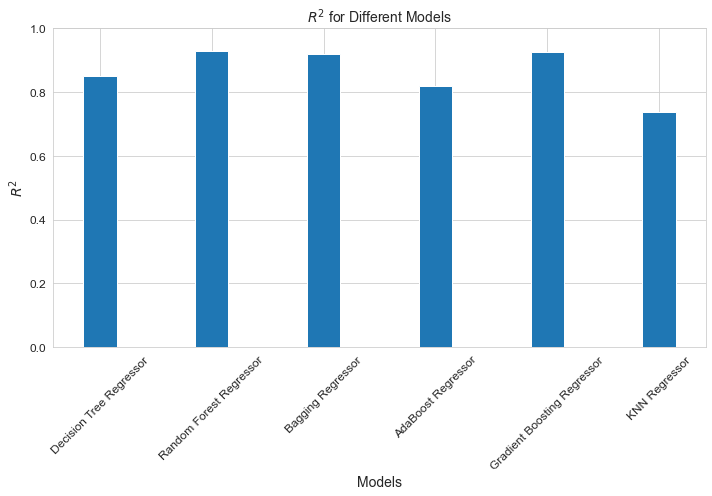

In [72]:
import sklearn.metrics as metrics

models = [pipe_DT_predict, pipe_RF_predict, pipe_Bag_predict, pipe_Ada_predict, pipe_Grad_predict, pipe_KNN_predict] 
names = ['Decision Tree Regressor', 'Random Forest Regressor', 'Bagging Regressor', 'AdaBoost Regressor', 'Gradient Boosting Regressor', 'KNN Regressor'] 
r2 = [] 
for model in models: 
    r2.append(metrics.r2_score(Y_test, model))
x = np.arange(len(names)) 
width = 0.3 
fig, ax = plt.subplots(figsize=(10,7)) 
rects = ax.bar(x, r2, width) 
ax.set_ylabel('$R^{2}$', fontsize=14) 
ax.set_xlabel('Models', fontsize=14) 
ax.set_title('$R^{2}$ for Different Models', fontsize=14) 
ax.set_xticks(x) 
ax.set_xticklabels(names, rotation=45) 

plt.xticks(fontsize=12)
plt.yticks(fontsize=12) 

ax.set_ylim (0,1)

fig.tight_layout()
plt.savefig('R_squared.eps', format='eps')
plt.show()




- To select a performance measure, the regression estimation of average deviation R2 is used (R2 = 1- (SSE/SST), SSE: Sum of Square Errors, SST: Total Sum of Squares). It gives an idea of how much error the model typically makes in its predictions. R2 values are ranged between 0 to 1. A high R2 value (> 0.9) shows a good model performance, where the predicted values are too close to the actual values. Whereas, a low R2 value indicates a weak model performamce, where the average error deviation between predicted and observed values is large.


- The above barplot shows the R2 of different used models, where the Gradient Boosting ensemble gives the highest R2= 0.928 on the test data and the closed to the accurancy measured for the training data, with the lowest Root Mean Square Error (RMSE) of 4.297 MPa.

## 6. Inference about the data analysis:

**This study provides a detailed understanding of the performance of 6 machine learning models (Decision Tree, Random Forest, Bagging, AdaBoost, Gradient Boosting, and KNN), adopted for the compressive strength prediction of concrete materials.** 

- A set of 1030 samples of concrete compressive tests are collected, and the variables are divided into 8 inputs and 1 output (concrete strength value). 


- Feature engineering is crucial in this study to facilitate the prediction. We found that the concrete strength is inversely proportional to the Water/cement ratio and highly dependent on the superplastic/water ratio, together with coarse/fine aggregate ratio. Therefore, these ratios were created as new features from existing features and included in the dataset as three new columns. We also have dropped redundant columns (cement, superplastic, water, coarseagg,and fineagg).


- The obtained dataset is split into 80% training set and 20% testing set. Each model is trained and validated using cross-validation in the training set and then evaluated by the testing set. We have tuned the hyperparameter for selected promising models (Random Forest, Bagging, and the Gradient Boosting).


- Based on the results, the following conclusions can be drawn:

`(1) As shown in the figures below, the Gradient Boosting model can accurately and efficiently predict the compressive strength of concrete, compared to other models.`
      
`(2) The average R2 of the 10-fold cross-validation may reach 0.928 (~93%), and the average MAE may reach 3 MPa, which means the prediction error is very low. Meanwhile, the average RMSE is ~ 4 MPa, indicating that the model also has a low prediction deviation.`

`(3) As key features, the water/cement, and superplasticizer/water ratios are the most important input variables and strongly affect the final predictions. Also, we saw that the compressive strength is closely dependent on the aging time for a certain concrete composition. The longer the aging time, the stronger the concrete will be.`

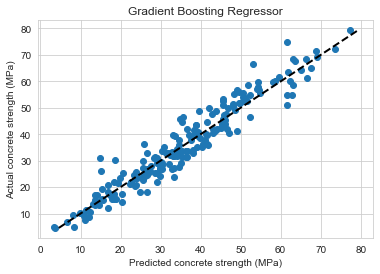

In [52]:
plt.scatter(pipe_Grad_predict, Y_test) 
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2) 
plt.xlabel("Predicted concrete strength (MPa)") 
plt.ylabel("Actual concrete strength (MPa)") 
plt.title("Gradient Boosting Regressor") 
plt.show()

In [61]:
Y_df = pd.DataFrame({'Actual Concrete Strength': Y_test, 'Predicted Concrete Strength': pipe_Grad_predict})
Y_df.head()

,Actual Concrete Strength,Predicted Concrete Strength
204,18.030,16.823
294,26.910,30.430
709,53.770,50.999
716,27.340,33.300
60,20.730,16.961


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


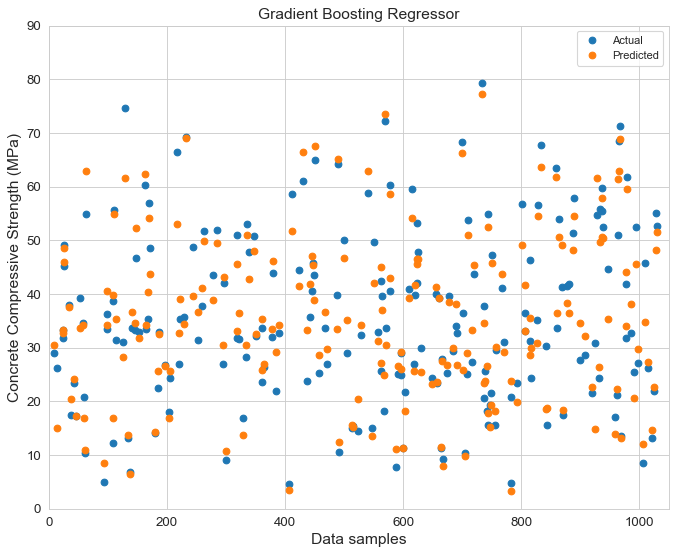

In [71]:
figure(figsize=(10, 8), dpi=80)
lines= plt.plot(Y_df, marker='o',linestyle='');
plt.xlabel("Data samples", fontsize=14) 
plt.ylabel("Concrete Compressive Strength (MPa)", fontsize=14) 
plt.title("Gradient Boosting Regressor", fontsize=14) 
plt.xlim (0,1050);
plt.ylim (0, 90);
plt.legend(lines[:2], ['Actual', 'Predicted']);
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.savefig('Actual_predicted.eps', format='eps')
plt.show()


 ## 7. Business Recommendations:

**The Gradient Boosting model could be employed to efficiently obtain the concrete compressive strength of different mix concrete proportion.** 

 - From the data analysis, feature engineering is used as one of the tools to obtain a high concrete compressive strength predictions. By feature engineering, three new features, namely (Water/cement ratio, Superplastic/water ratio, and Coarse/fine aggregate ratio) are extracted from the existing features, and used in building the models.
 
 
 - To obtain highest compressive strength, it is recommended to use a water/cement ratio between ~0.3 and 0.4, with a superplastic/water ratio between 0.08 to 0.16, together with a coarse/fine aggregate ratio between ~1.2 and 1.6. For the seek of comparison, a water/cement ratio of 0.4 is often adopted in several concrete factories and research works in laboratories. This indicated the reliability of the current model and its predictions.  

- By reducing the water content in the cement, we will limit the use of the superplasticizer required to eliminate the excess water. This will cut off the extra cost needed for purchasing the superplasticizer (~ 15USD/10kg).


- For a given water/cement ratio of 0.3, a superplasticizer/water ratio of 0.16 and a coarse/fine aggregate ratio of 1.2, we noticed that the concrete would have the highest compressive strength (more than 80 MPa) if aged for up to ~ 150 days.


- In addition to the current dataset, it is recommended to add curing time (i.e., membrane curing, spray curing, or steam curing) to the concrete production process. This will ensure the concrete will retain the optimum humidity, moisture and temperature required for a high-strength and good workability. The higher the curing time, the higher the strength of the concrete.  


- Also, compaction should also be done correctly to the concrete to get enough strength. The lack of compaction leads to the formation of air voids, which cause the loss of concrete strength. Compaction can be done using vibration.


Consequently, this data-driven model can be employed to check whether the designed mix proportion can satisfy the target strength requirement and see the compressive strength growing rate at the different aging times. It will help engineers perform approval analysis during the construction stage and safety measurements during the service stage.